# MOWNIT - LAB 2 - Rozwiązywanie układów równań liniowych

### część 1 - Metoda Gaussa-Jordana

In [3]:
import random
import time
import numpy as np
import igraph as ig
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
def normalizing(matrix):
    n = len(matrix)
    for i in range(n):
        max_var = max(matrix[i][:-1])
        if max_var < abs(min(matrix[i][:-1])):
            max_var = min(matrix[i][:-1])
        matrix[i] = [matrix[i][x]/max_var for x in range(n+1)]
    return matrix

In [5]:
#Zwraca indeks wartosci najwiekszej w kolumnie

def partial_pivoting(ind_c, matrix, changed) -> int:
    n = len(matrix)
    index_biggest = ind_c
    for i in range(1+ind_c,n):
        if abs(matrix[changed[i]][ind_c]) > abs(matrix[changed[index_biggest]][ind_c]):
            index_biggest = i
    return index_biggest

#Dokoncz implementacje jesli bedziesz miec czas!!!!!
#dodaj changed
def full_pivoting(ind, matrix) -> tuple:
    n = len(matrix)
    index_biggest = (ind,ind)
    for i in range(1+ind_c,n):
        if abs(matrix[i][ind]) > abs(matrix[index_biggest[0]][index_biggest[1]]):
            index_biggest = (i, ind)
        if abs(matrix[ind][i]) > abs(matrix[index_biggest[1]][index_biggest[1]]):
            index_biggest = (ind, i)
    return index_biggest

In [6]:
def count_with_pivoting(matrix, fullpivoting=False):
    matrix = normalizing(matrix)
    n = len(matrix)
    
    pivoting = [i for i in range(n)]
    
    #zerowanie dolnego trójkąta
    for col in range(n): # zastanow sie nad zmiana nazwy col
        
        #partial-pivoting w miejscu
        to_change = partial_pivoting(col, matrix, pivoting)
        pivoting[to_change], pivoting[col] = pivoting[col], pivoting[to_change]

        for i in range(col+1,n):
            multiplier = -matrix[pivoting[i]][col]/matrix[pivoting[col]][col]
            for new_col in range(0, len(matrix[i])):
                if new_col > col:
                    matrix[pivoting[i]][new_col] += (matrix[pivoting[col]][new_col]*multiplier)
                # else:
                #     matrix[pivoting[i]][new_col] = 0


    #zerowanie gornego trójkata
    for col in range(n-1, 0,-1):

        for i in range(0,col):
            multiplier = -matrix[pivoting[i]][col]/matrix[pivoting[col]][col]
            matrix[pivoting[i]][-1] += matrix[pivoting[col]][-1]*multiplier

            # for new_col in range(0, len(matrix[i])):
                # if new_col < col or new_col >= n:
                #     matrix[pivoting[i]][new_col] += (matrix[pivoting[col]][new_col]*multiplier)
                # else:
                #     matrix[pivoting[i]][new_col] = 0
        
    return [matrix[pivoting[i]][-1]/matrix[pivoting[i]][i] for i in range(len(matrix))]
                


In [7]:
def count_without_pivoting(matrix):
    matrix = normalizing(matrix)
    n = len(matrix)
    
    #zerowanie dolnego trójkąta
    for col in range(n): # zastanow sie nad zmiana nazwy col

        for i in range(col+1,n):
            multiplier = -matrix[i][col]/matrix[col][col]
            for new_col in range(0, len(matrix[i])):
                if new_col > col:
                    matrix[i][new_col] += (matrix[col][new_col]*multiplier)
                # else:
                #     matrix[i][new_col] = 0


    #zerowanie gornego trójkata
    for col in range(n-1, 0,-1):
        
        for i in range(0,col):
            multiplier = -matrix[i][col]/matrix[col][col]
            matrix[i][-1] += matrix[col][-1]*multiplier

            # for new_col in range(0, len(matrix[i])):
            #     if new_col <= col or new_col >= n:
            #         matrix[i][new_col] += (matrix[col][new_col]*multiplier)
            #     else:
            #         matrix[i][new_col] = 0
        
    matrix = normalizing(matrix)
    return [matrix[i][-1]/matrix[i][i] for i in range(len(matrix))]
                


In [8]:
#testy
def test_matrix_int(n, eguation=True):
    if eguation:
        plus = 1
    else:
        plus = 0
    return [[random.randint(1,100) for _ in range(n+plus)] for _ in range(n)]


random.seed(10)
n = [random.randint(500,600) for _ in range(2)]
testing_matrixs = [test_matrix_int(i) for i in n]

In [9]:
# testuj bez pivotingu + z innych bibliotek + full pivoting
# Sprawdz dokladnosc wynikow ( funkcje + po przecinku ile)
#Testing
def are_the_same(a1, a2, after_comma=5):
    if len(a1) != len(a2):
        return False
    for i in range(len(a1)):
        if round(a1[i],after_comma) != round(a2[i],after_comma):
            return False
    return True

index = 0
for m in testing_matrixs:
    index += 1
    A = [[m[i][j] for j in range(len(m))] for i in range(len(m))]
    B = [m[i][-1] for i in range(len(m))]
    t1_lib = time.time()
    library_result = np.linalg.solve(np.array(A), np.array(B))
    t_lib = np.round(time.time() - t1_lib, 3)

    t1_my = time.time()
    a = count_with_pivoting(m)
    t_my = np.round(time.time() - t1_my, 3)

    my_result = np.array(a)
    
    print(f"Test {index}: {are_the_same(library_result,my_result)}  wielkość: {len(m)} \n czas biblioteczny: {t_lib} \n czas mój: {t_my} \n")

Test 1: True  wielkość: 573 
 czas biblioteczny: 0.313 
 czas mój: 12.144 

Test 2: True  wielkość: 504 
 czas biblioteczny: 0.025 
 czas mój: 6.594 



#### Wnioski


### Część 2 - Faktoryzacjza LU

In [10]:
def create_u_and_L(matrix):
    # matrix = normalizing(matrix)
    n = len(matrix)
    
    #zerowanie dolnego trójkąta
    for col in range(n):

        for i in range(col+1,n):
            multiplier = -matrix[i][col]/matrix[col][col]
            matrix[i][col] = - multiplier
            for new_col in range(0, n):

                if new_col > col:
                    matrix[i][new_col] += (matrix[col][new_col]*multiplier) 
        
    return matrix

In [11]:
t = [[5,3,2], [1,2,0],[3,0,4]]
print(*create_u_and_L(t), sep="\n")

[5, 3, 2]
[0.2, 1.4, -0.4]
[0.6, -1.2857142857142856, 2.2857142857142856]


In [12]:
def check_factorization(A,LU):
    n = len(A)
    # || A - LU || = 0

    #mnozenie L i U
    new = [[0 for _ in range(len(A))] for _ in range(n)]
    for i in range(n):

        for j in range(n):

            for k in range(n):
                var = 1
                if i == k:
                    var *= 1
                elif i > k:
                    var *= LU[i][k]
                else:
                    var *= 0
                if k <= j:
                    var *= LU[k][j]
                else:
                    var *= 0
                new[i][j] += var

    #odejmowanie
    A_N = np.array(A).reshape(n,n)
    LU_N = np.array(new).reshape(n,n)
    substract = A_N - LU_N

    return np.linalg.det(substract)

In [13]:
print(check_factorization([[4,3],[6,3]], [[4,3], [1.5, -1.5]]))

0.0


In [14]:
#Testy
tests = [test_matrix_int(50, True) for _ in range(10)]


index = 0
for m in tests:
    copy = [[m[i][j] for j in range(len(m))] for i in range(len(m))]
    index += 1
    
    tr = time.time()
    result = create_u_and_L(m)
    timet = np.round(time.time() - tr, 3)
    print(f"Test {index} czas: {timet} błąd: {check_factorization(copy, result)}")

Test 1 czas: 0.007 błąd: 0.0
Test 2 czas: 0.007 błąd: 0.0
Test 3 czas: 0.02 błąd: 0.0


Test 4 czas: 0.024 błąd: 0.0
Test 5 czas: 0.009 błąd: 0.0
Test 6 czas: 0.011 błąd: 0.0
Test 7 czas: 0.005 błąd: 0.0
Test 8 czas: 0.007 błąd: 0.0
Test 9 czas: 0.004 błąd: 0.0
Test 10 czas: 0.005 błąd: 0.0


### Wnioski

## Część 3 - Analiza obwodu elektrycznego

### **1. Wczytywanie z pliku**

Wczytujemy plik z katalogu testy_lab2

##### Przykład pliku:

10 - ilość wierzchołków grafu

0 1 10 - opór miedzy wierzchołkiem 0 i 1 wynosi 10

1 2 5

0 2 3

0 5 11

3 4 12

0 3 10

2 4 2

In [15]:
def read_from_file(name):
    file = open(f"testy_lab2/{name}", "r")
    lines = file.readlines()
    n = int(lines[0][:-1])
    graph = [[] for _ in range(n)]
    edges = []
    dic = {}

    index = 0

    for line in lines[1:]:

        if line[-1] == "\n":
            line = line[:-1]

        line = line.split(" ")
        v1, v2, R = map(int,line)
        
        if v1 > v2:
            v1, v2 = v2, v1

        graph[v1].append((v2, R, -1, index)) # wierzchołek, opór, przepływ prądu ( 1 wplywa, -1 wyplywa)
        graph[v2].append((v1, R, 1, index))
        edges.append([v1, v2])
        dic[(v1,v2)] = [index, R]
        index += 1

    return graph, edges, index, dic
    

In [16]:
g, e, m, dic = read_from_file("test1")
n = len(g)

### **2. Wizualizacja grafów**

In [136]:
def visualize_graph(n, edges, resistances=None):
    g = ig.Graph(n = n, edges = edges)
    layout = g.layout("kk")
    fig, ax = plt.subplots()
    ig.plot(g, vertex_size=10, target=ax, edge_label=resistances, layout = layout, edge_align_label = True, edge_color="blue")

In [18]:
def edge_color(intensivity, max_intensivity):
    i = intensivity/(max_intensivity)
    if i < 0.25:
        R = 0.5 + i
        G = 0.5 - i
    else:
        R = 0.5 - i
        G = 0.5 + i

    color = (i,0.5, 0.5)
    return color

def visualize_with_intensity(n, edges, intensivity, resistances=None):
    g = ig.Graph(n=n, edges = edges)
    layout = g.layout("kk")
    intensivity = list(map(abs, intensivity))
    
    colors = []
    for edge in intensivity:
        colors.append(edge_color(edge, max(intensivity)))
    fig, ax = plt.subplots()

    ig.plot(g, vertex_size=10, layout=layout, target=ax, edge_color=colors)


#Zrob scale kolorow!!!
def color_scale():
    colors = []
    for i in range(30):
        colors.append(edge_color(i,30))
    sns.color_palette(colors)

### **3. Przykładowe grafy**

In [19]:
seed = 20
global max_R
max_R = 30

In [111]:
def read_graph(n,nx_graph):
    graph = [[] for _ in range(n)]
    edges = []
    dic = {}
    index = 0
    vertex = 0
    vertexes = {}

    for line in nx.generate_edgelist(nx_graph, " " ):
        R = random.randint(1, max_R)
        if len(line.split(" ")) > 3:
            line = line[:-4].split(") (")
            v1 = line[0][1:].split(", ")
            v1 = (v1[0], v1[1])
            v2 = line[1].split(", ")
            v2 = (v2[0], v2[1])
            if vertexes.get(v1) == None:
                vertexes[v1] = vertex
                v1 = vertex
                vertex += 1
            else:
                v1 = vertexes.get(v1)
            if vertexes.get(v2) == None:
                vertexes[v2] = vertex
                v2 = vertex
                vertex += 1
            else:
                v2 = vertexes.get(v2)
        else:
            line = line.split(" ")[0:2]
            v1, v2 = map(int,line)
        
        if v1 >= v2:
            v1, v2 = v2, v1

        graph[v1].append((v2, R, -1, index)) # wierzchołek, opór, przepływ prądu ( 1 wplywa, -1 wyplywa)
        graph[v2].append((v1, R, 1, index))
        edges.append([v1, v2])
        dic[(v1,v2)] = [index, R]
        index += 1

    return graph, edges, index, dic

In [134]:
# nie jest spójny ???
def Random_graph(v):
    g = nx.gnm_random_graph(v, 2*v)
    while not nx.is_connected(g):
        g = nx.gnm_random_graph(v, 2*v)
    return g

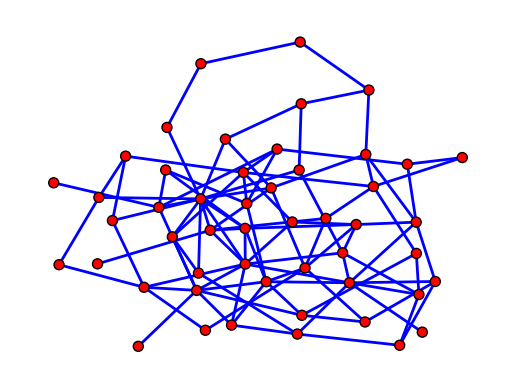

In [156]:
visualize_graph(50,read_graph(50,Random_graph(50))[1])

In [24]:
def regular_3_graph(v):
    g = nx.random_regular_graph(3,v,seed=20)
    return g

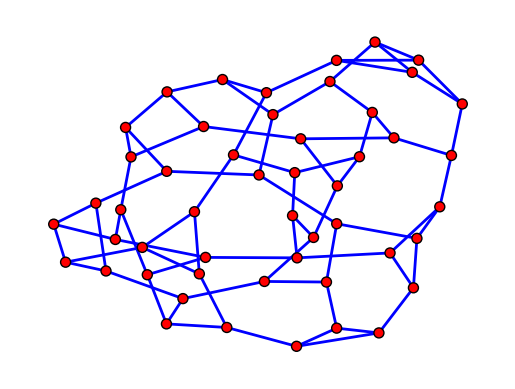

In [145]:
visualize_graph(50,read_graph(50,regular_3_graph(50))[1])

In [150]:
def windmill_graph(v, k):
    g = nx.windmill_graph(v, k)
    return g

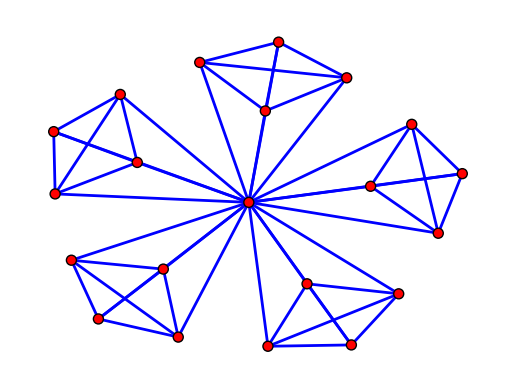

In [154]:
visualize_graph(21,read_graph(21,windmill_graph(5,5))[1])

In [27]:
def net_graph(v):
    g = nx.grid_2d_graph(v,v)
    return g

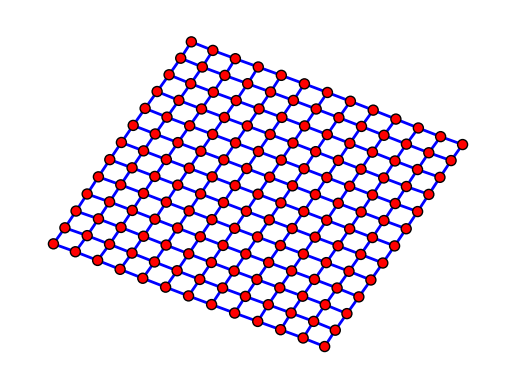

In [146]:
visualize_graph(169,read_graph(169,net_graph(13))[1])

In [80]:
def small_world_graph(v):
    g = nx.navigable_small_world_graph(v, 1, 1)
    return g

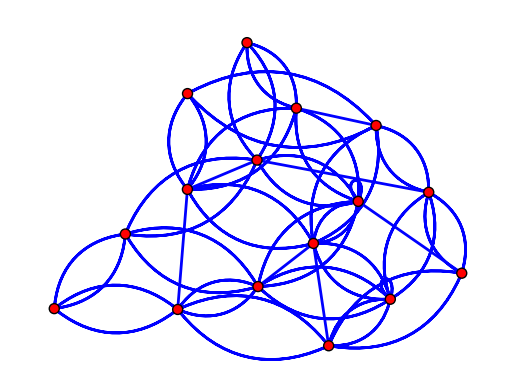

In [144]:
visualize_graph(16,read_graph(16,small_world_graph(4))[1])

### **4. Testy poprawności**

In [31]:
def Test(graph, intensivity, s, t,epsilon, complex_test = False):

    input = 0

    for i in graph[s]:
        input += abs(intensivity[i[-1]])

    for o in graph[t]:
        input -= abs(intensivity[o[-1]])

    if complex_test:   
        for v in range(len(graph)):
            if v in [s,t]:
                continue
            in_v = 0
            for next in graph[v]:
                index_next = next[-1]
                
                if (intensivity[index_next] > 0 and v > next[0]):
                    in_v += abs(intensivity[index_next])
                elif (intensivity[index_next] < 0 and v < next[0]):
                    in_v += abs(intensivity[index_next])
                else:
                    in_v -= abs(intensivity[index_next])
            if abs(in_v) > epsilon:
                return False

    return abs(input) < epsilon


### **5. Rozwiązania**

1. Metoda praw Kirchoffa

In [32]:
def kirchoff_1(m, n, graph, s, t):
    matrix = []
    for i in range(n):
        if i not in [s,t]:
            row = [0 for _ in range(m)]
            for _, _, direction, index  in graph[i]:
                row[index] = direction
            matrix.append(row)
    return matrix
    

In [33]:
# def kirchoff_2(n, edges,dic):
#     m = len(edges)
#     x = m - (n-2)
    
#     def find_x_Cycles(edges, x):

#         def findNewCycles(path):
#             start_node = path[0]
#             next= None
#             sub = []

#             #visit each edge and each node of each edge
#             for edge in edges:
#                 v1, v2 = edge
#                 if start_node in edge:
#                         if v1 == start_node:
#                             next = v2
#                         else:
#                             next = v1
#                         if next not in path:
#                                 # neighbor node not on path yet
#                                 sub = [next]
#                                 sub.extend(path)
#                                 # explore extended path
#                                 findNewCycles(sub)
#                         elif len(path) > 2  and next == path[-1]:
#                                 # cycle found
#                                 p = rotate_to_smallest(path)
#                                 inv = rotate_to_smallest(p[::-1])
#                                 if (p not in cycles) and (inv not in cycles):
#                                     cycles.append(p)

#         #  rotate cycle path such that it begins with the smallest node
#         def rotate_to_smallest(path):
#             n = path.index(min(path))
#             return path[n:]+path[:n]
    
#         cycles = []
#         for edge in edges:
#             for node in edge:
#                 if len(cycles) >= x:
#                     return cycles
#                 findNewCycles([node])

#     cycles = find_x_Cycles(edges, x)
#     matrix = []
#     for cycle in cycles[0:x]:
#         row = [0 for _ in range(m)]
#         for i in range(len(cycle)):
#             if cycle[i-1] < cycle[i]:
#                 key = (cycle[i-1], cycle[i])
#                 index, R = dic.get(key)
#                 row[index] = -R
#             else:
#                 key = (cycle[i],cycle[i-1])
#                 index, R = dic.get(key)
#                 row[index] = R
#         matrix.append(row)
#     return matrix


In [34]:
def kirchoff_2(n, graph,s,t, dic):

    def find_all_paths(G, u, v):
    
        def DFS(u, v, visited, simplePaths=[], currentPath=[]):

            if visited[u]:
                return simplePaths

            visited[u] = True
            currentPath.append(u)

            if u == v:
                simplePaths.append(currentPath.copy())
            else:
                for next, _, _, _ in G[u]:
                    simplePaths = DFS(next, v, visited, simplePaths, currentPath)

            currentPath.pop()
            visited[u] = False
            return simplePaths

        visited = [False for _ in range(n)]
        return DFS(u,v,visited)

    paths = find_all_paths(graph, s, t)
    m = len(dic)
    matrix = []
    for path in paths:
        row = [0 for _ in range(m)]
        for i in range(1,len(path)):
            if path[i-1] < path[i]:
                key = (path[i-1], path[i])
                index, R = dic.get(key)
                row[index] = R
            else:
                key = (path[i],path[i-1])
                index, R = dic.get(key)
                row[index] = -R
        matrix.append(row)

    return matrix


In [41]:
def find_intensity_with_kirchoff(name, s, t, E, epsilon = 0.0001):
    # graph, edges, indexes, dic = read_from_file(name)
    graph, edges, indexes, dic = read_graph(16,net_graph(4))
    n = len(graph)

    visualize_graph(n, edges)

    matrix1 = kirchoff_1(indexes,n,graph,s,t)
    matrix2 = kirchoff_2(n,graph,s,t, dic)
    result = [0 for _ in range(len(matrix1))] + [E for _ in range(len(matrix2))]
    matrix = np.array(matrix1+matrix2)

    intensity = np.linalg.lstsq(matrix, np.array(result),rcond=None)[0]

    print(f"Test: {Test(graph, intensity, s, t, epsilon, False)} epsilon: {epsilon} complex_test: True")
    visualize_with_intensity(n, edges, intensity)

    

Test: True epsilon: 0.0001 complex_test: True


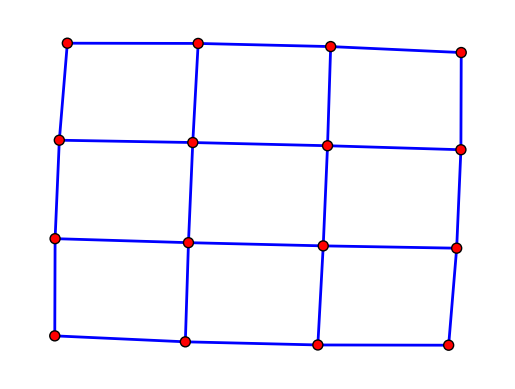

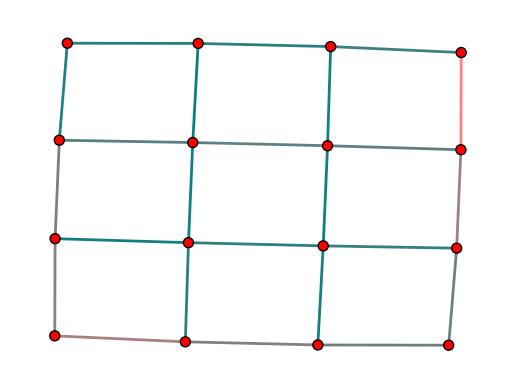

In [42]:
find_intensity_with_kirchoff("test1", 0, 15, 10)